## Load Libraries

In [25]:
import keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

### About dataset

#### We have data for training:


500 horse images and 527 human(male & Female) images

For Validation:

122 Horse Images and 123 Human(male & Female) images


### Problem Statement

Clssifie the given image is horse or not

##### Solving this problem 

we are going to use Deep Learning  Algorithm that is CNN


### Load Data

In [26]:
train_data = "train/"
validation_data = "validation/"

### Data Preprocessing

#### 1.Image Augumentation - Generating More Images

In [27]:
#For tarining
train_data_gen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

In [28]:
train_data1 = train_data_gen.flow_from_directory(train_data,
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='binary')

Found 1027 images belonging to 2 classes.


In [29]:
train_data1.class_indices

{'horses': 0, 'humans': 1}

In [30]:
#For Validation 

validation_data_gen = ImageDataGenerator(rescale=1./255)

In [31]:
validation_data1 = validation_data_gen.flow_from_directory(validation_data,
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='binary')

Found 256 images belonging to 2 classes.


In [37]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

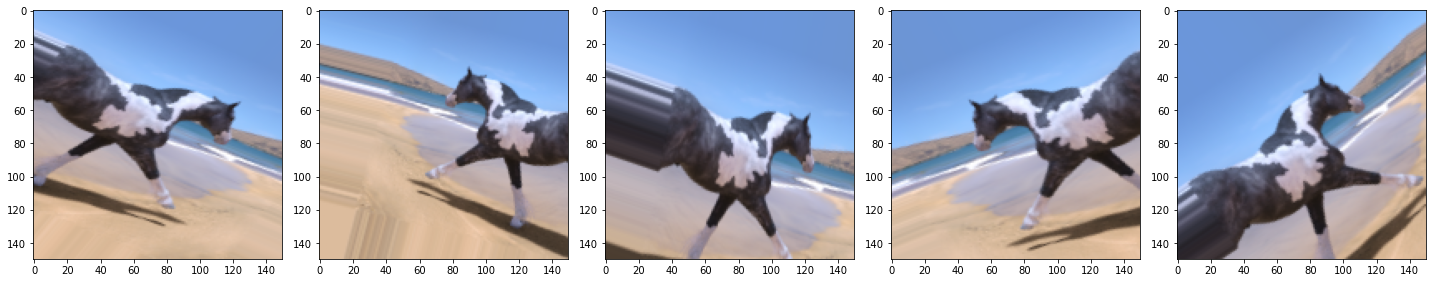

In [38]:
images = [train_data1[0][0][0] for i in range(5)]
plotImages(images)

### Building CNN

In [39]:
cnn_model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150,150,3]),
    keras.layers.MaxPooling2D(pool_size=(2,3)),
    keras.layers.Conv2D(filters=64, kernel_size=3),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=128, kernel_size=3),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=3),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(), #after this we will go for neural network building
    keras.layers.Dense(units=128, activation='relu'), #inputlayers
    keras.layers.Dropout(0.1),
    keras.layers.Dense(units=256, activation='relu'), #Hidden layer
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=2, activation='softmax') #output layer with 2 neurons
        
])

### Model Compile

In [40]:
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

In [41]:
cnn_model.compile(optimizer=Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [42]:
model_path='human_horse_predict.h5'

In [43]:
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

### Train model

In [44]:
history = cnn_model.fit(train_data1,
                       epochs=100,
                       verbose=1,
                       validation_data=validation_data1,
                       callbacks=callbacks_list)

Epoch 1/100
33/33 [==============================] - ETA: 0s - loss: 0.7019 - accuracy: 0.5275
Epoch 00001: val_accuracy improved from -inf to 0.58203, saving model to human_horse_predict.h5
33/33 [==============================] - 41s 1s/step - loss: 0.7017 - accuracy: 0.5279 - val_loss: 0.6514 - val_accuracy: 0.5820
Epoch 2/100
33/33 [==============================] - ETA: 0s - loss: 0.6705 - accuracy: 0.5962
Epoch 00002: val_accuracy improved from 0.58203 to 0.82422, saving model to human_horse_predict.h5
33/33 [==============================] - 28s 856ms/step - loss: 0.6702 - accuracy: 0.5960 - val_loss: 0.5106 - val_accuracy: 0.8242
Epoch 3/100
33/33 [==============================] - ETA: 0s - loss: 0.6197 - accuracy: 0.6546
Epoch 00003: val_accuracy did not improve from 0.82422
33/33 [==============================] - 30s 923ms/step - loss: 0.6191 - accuracy: 0.6552 - val_loss: 0.4528 - val_accuracy: 0.7539
Epoch 4/100
33/33 [==============================] - ETA: 0s - loss: 0.5

Epoch 29/100
33/33 [==============================] - ETA: 0s - loss: 0.1876 - accuracy: 0.9216
Epoch 00029: val_accuracy did not improve from 0.82422
33/33 [==============================] - 29s 878ms/step - loss: 0.1878 - accuracy: 0.9214 - val_loss: 3.9346 - val_accuracy: 0.6094
Epoch 30/100
33/33 [==============================] - ETA: 0s - loss: 0.2553 - accuracy: 0.8961
Epoch 00030: val_accuracy did not improve from 0.82422
33/33 [==============================] - 29s 878ms/step - loss: 0.2552 - accuracy: 0.8962 - val_loss: 2.8872 - val_accuracy: 0.6289
Epoch 31/100
33/33 [==============================] - ETA: 0s - loss: 0.2178 - accuracy: 0.9200
Epoch 00031: val_accuracy did not improve from 0.82422
33/33 [==============================] - 28s 863ms/step - loss: 0.2175 - accuracy: 0.9200 - val_loss: 3.9709 - val_accuracy: 0.5938
Epoch 32/100
33/33 [==============================] - ETA: 0s - loss: 0.2301 - accuracy: 0.9023
Epoch 00032: val_accuracy did not improve from 0.82422


Epoch 58/100
33/33 [==============================] - ETA: 0s - loss: 0.1021 - accuracy: 0.9561
Epoch 00058: val_accuracy did not improve from 0.82422
33/33 [==============================] - 22s 661ms/step - loss: 0.1020 - accuracy: 0.9562 - val_loss: 4.5022 - val_accuracy: 0.5977
Epoch 59/100
33/33 [==============================] - ETA: 0s - loss: 0.0837 - accuracy: 0.9671
Epoch 00059: val_accuracy did not improve from 0.82422
33/33 [==============================] - 21s 646ms/step - loss: 0.0845 - accuracy: 0.9669 - val_loss: 4.2704 - val_accuracy: 0.5898
Epoch 60/100
33/33 [==============================] - ETA: 0s - loss: 0.0720 - accuracy: 0.9715
Epoch 00060: val_accuracy did not improve from 0.82422
33/33 [==============================] - 21s 629ms/step - loss: 0.0723 - accuracy: 0.9715 - val_loss: 4.3346 - val_accuracy: 0.5898
Epoch 61/100
33/33 [==============================] - ETA: 0s - loss: 0.0783 - accuracy: 0.9703
Epoch 00061: val_accuracy did not improve from 0.82422


Epoch 87/100
33/33 [==============================] - ETA: 0s - loss: 0.0420 - accuracy: 0.9821
Epoch 00087: val_accuracy did not improve from 0.82422
33/33 [==============================] - 22s 667ms/step - loss: 0.0421 - accuracy: 0.9821 - val_loss: 3.4188 - val_accuracy: 0.6367
Epoch 88/100
33/33 [==============================] - ETA: 0s - loss: 0.0420 - accuracy: 0.9896
Epoch 00088: val_accuracy did not improve from 0.82422
33/33 [==============================] - 19s 572ms/step - loss: 0.0420 - accuracy: 0.9895 - val_loss: 3.5059 - val_accuracy: 0.6406
Epoch 89/100
33/33 [==============================] - ETA: 0s - loss: 0.0494 - accuracy: 0.9860
Epoch 00089: val_accuracy did not improve from 0.82422
33/33 [==============================] - 22s 661ms/step - loss: 0.0492 - accuracy: 0.9860 - val_loss: 4.4160 - val_accuracy: 0.6133
Epoch 90/100
33/33 [==============================] - ETA: 0s - loss: 0.0646 - accuracy: 0.9777
Epoch 00090: val_accuracy did not improve from 0.82422


### Model Summary

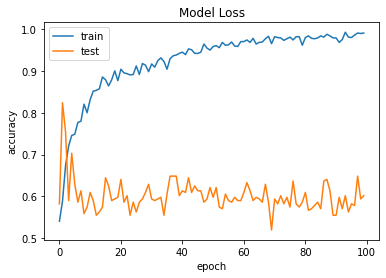

In [54]:
#Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


### Summarize history for loss

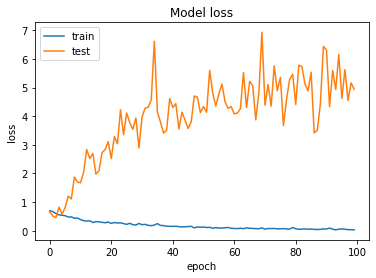

In [55]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

So, here our model overfitted, but it has 82% accuracy

### Model Testing

In [57]:
model1 = keras.models.load_model(model_path)

In [58]:
##Horse images

h1 = 'train/horses/horse01-1.png'
h2 = 'train/horses/horse01-2.png'
h3 = 'train/horses/horse01-5.png'

#human images 
hu1 = 'train/humans/human01-02.png'
hu2 = 'train/humans/human01-05.png'
hu3 = 'train/humans/human01-08.png'


In [59]:
import numpy as np
from keras.preprocessing import image

In [60]:
def pred_human_horse(model, horse_or_human):
    test_image = image.load_img(horse_or_human, target_size = (155,155))
    test_image = image.img_to_array(test_image)/255
    test_image = np.expand_dims(test_image, axis=0)
    
    result = model.predict(test_image).round(3)
    
    pred = np.argmax(result)
    
    if pred==0:
        print("Horse")
    else:
        print("Human")

### Prediction

In [61]:
for horse_or_human in [h1,h2,h3]:
    pred_human_horse(model1, horse_or_human)

Horse
Horse
Horse


In [62]:
for horse_human in [hu1,hu2,hu3]:
    pred_human_horse(model1, horse_human)

Human
Human
Human
